Authors: Rebeka Ćorić, Mario Essert, Domagoj Ševerdija

**Abstract:** This paper gives a model for classifing croatian verbs with respect to the infinitive form.  The output of our model is twofold: for every class it gives probability of being in certain class and designates verb morphs that are instrumental to classification. 

## Problem definition

Linguistic approach definition of our problem ...

## model

Model is based on Convolutional Neural Network with final fully connected layer with softmax prediction on $n$ labels. 

In [1]:
from CNNmodel import *

In [2]:
#ucitaj podatke ili model
train_set, val_set, test_set, sve_kategorije = ucitajPodatke()

parameters of model

In [3]:
emb_size = 300
out_size = len(sve_kategorije)
batch_size = 25
output_dir ="results/{:%Y%m%d_%H%M%S}/".format(datetime.now())
epochs = 500
lr = 0.005
filter_sizes = [1,2,3,5]
num_filters  = 36
dropout_rate = 0.1
model_weights_path='model/model.weights'

## Training

In [12]:

#treniraj model
preload = True
model = CNN_Text(out_size, vocab_len, emb_size, weights_matrix, filter_sizes, num_filters, dropout_rate)
model_weights_path = train(model, train_set, val_set, batch_size, output_dir, epochs, lr) if not model_weights_path else model_weights_path

model.load_state_dict(torch.load(model_weights_path))
print('trenirani model iz :', model_weights_path)





trenirani model iz : model/model.weights


## Evalutation

Final evaluation on test set
test loss 0.248, test accuracy 0.937, test rmse 0.774, test microF1 0.771, test macroF1 0.937, test weightedF1 0.932
tensor([[0.9597, 0.0134, 0.0027, 0.0027, 0.0000, 0.0081, 0.0134],
        [0.0179, 0.9286, 0.0000, 0.0536, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.0000, 0.7500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3000, 0.0000, 0.7000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8000, 0.2000, 0.0000],
        [0.0000, 0.0244, 0.0000, 0.0000, 0.0244, 0.9024, 0.0488],
        [0.1250, 0.0000, 0.0000, 0.0000, 0.0000, 0.1250, 0.7500]])


/home/dseverdi/Radno/morphology/HR_glagoli/CNNmodel.py:236: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + nazivi, rotation=90)
/home/dseverdi/Radno/morphology/HR_glagoli/CNNmodel.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + nazivi)


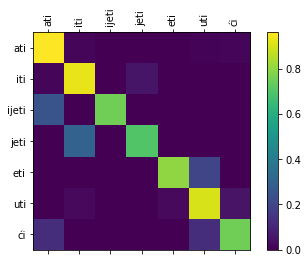

In [6]:
#evaluiraj na skupu za testiranje
#model_weights_path='results/20211116_130204/model.weights'
evaluateOnTestSet(model, model_weights_path, test_set,sve_kategorije)

## Testing

Model uses heatmaps to emphasize characters/morphemes which contributed to the classification. 

infinitiv završava na: ati


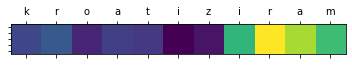

infinitiv završava na: ati


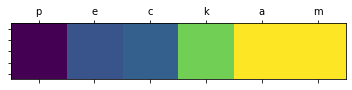

infinitiv završava na: ati


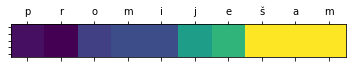

infinitiv završava na: ati


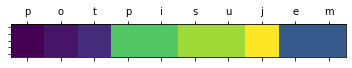

infinitiv završava na: ati


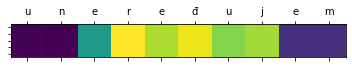

infinitiv završava na: ati


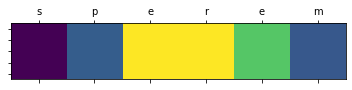

infinitiv završava na: ati


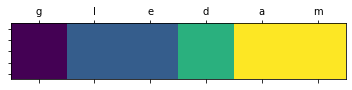

In [19]:

glagoli = ['kroatiziram','peckam','promiješam','potpisujem','uneređujem','sperem','gledam']


for gl in glagoli:
    #napravi heatmap
    heatmap(gl,model)

infinitiv završava na: iti


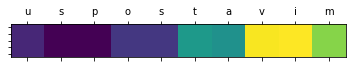

infinitiv završava na: iti


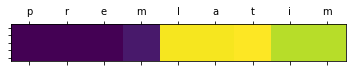

infinitiv završava na: iti


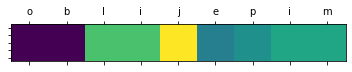

infinitiv završava na: iti


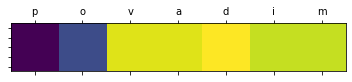

In [20]:
'uspostavim','premlatim','oblijepim', 'povadim'


glagoli = ['uspostavim','premlatim','oblijepim', 'povadim']


for gl in glagoli:
    #napravi heatmap
    heatmap(gl,model)

infinitiv završava na: uti


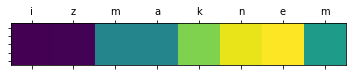

infinitiv završava na: uti


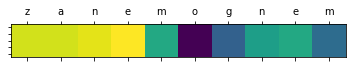

infinitiv završava na: ći


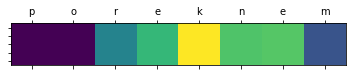

infinitiv završava na: ati


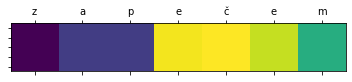

infinitiv završava na: ći


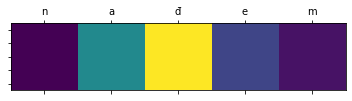

In [21]:
glagoli = ['izmaknem','zanemognem','poreknem', 'zapečem','nađem']

for gl in glagoli:
    #napravi heatmap
    heatmap(gl,model)